In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
data_QQQ = pd.read_excel('/content/drive/MyDrive/Андан Проект/Обработанные данные/Index_QQQ.xlsx', index_col='time')
data_SPY = pd.read_excel('/content/drive/MyDrive/Андан Проект/Обработанные данные/Index_SPY.xlsx', index_col='time')
data_SPX = pd.read_excel('/content/drive/MyDrive/Андан Проект/Обработанные данные/Index_SPX.xlsx', index_col='time')

Создадим новые функции для модели машинного обучения, в временных рядах это обычно данные за предыдущий период, так и сделаем: добавим лаги за 120 минут. Также добавим скользящую среднию за час (60) и торговый день (390).

In [ ]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
for i in range(120, 181):
    data_QQQ[f"lag_{i}"] = data_QQQ['open_QQQ'].shift(i)
data_QQQ['MA_60'] = data_QQQ['lag_120'].rolling(window=60).mean()
data_QQQ['MA_390'] = data_QQQ['lag_120'].rolling(window=390).mean()
data_QQQ.dropna(inplace=True)

In [ ]:
for i in range(120, 181):
    data_SPY[f"lag_{i}"] = data_SPY['open_SPY'].shift(i)
data_SPY['MA_60'] = data_SPY['lag_120'].rolling(window=60).mean()
data_SPY['MA_390'] = data_SPY['lag_120'].rolling(window=390).mean()
data_SPY.dropna(inplace=True)

In [ ]:
for i in range(120, 181):
    data_SPX[f"lag_{i}"] = data_SPX['open_SPX'].shift(i)
data_SPX['MA_60'] = data_SPX['lag_120'].rolling(window=60).mean()
data_SPX['MA_390'] = data_SPX['lag_120'].rolling(window=390).mean()
data_SPX.dropna(inplace=True)

In [ ]:
data_QQQ.drop(["high_QQQ", "low_QQQ", "close_QQQ", "std_log_return_QQQ"], axis=1, inplace=True)
data_SPY.drop(["high_SPY", "low_SPY", "close_SPY", "std_log_return_SPY"], axis=1, inplace=True)
data_SPX.drop(["high_SPX", "low_SPX", "close_SPX", "std_log_return_SPX"], axis=1, inplace=True)

In [ ]:
# Разделим выборку на трейн и тест, так чтобы в тесте остался только последний торговый день
# Также в прогнозировании временных рядов крайне важно ничего не шафлить
train_QQQ, test_QQQ = train_test_split(data_QQQ, test_size=0.085, shuffle=False)
train_SPY, test_SPY = train_test_split(data_SPY, test_size=0.096, shuffle=False)
train_SPX, test_SPX = train_test_split(data_SPX, test_size=0.085, shuffle=False)

In [ ]:
data_QQQ_train = train_QQQ.drop('open_QQQ', axis=1)
result_QQQ_train = train_QQQ['open_QQQ']

data_QQQ_test = test_QQQ.drop('open_QQQ', axis=1)
result_QQQ_test = test_QQQ['open_QQQ']

In [ ]:
data_SPY_train = train_SPY.drop('open_SPY', axis=1)
result_SPY_train = train_SPY['open_SPY']

data_SPY_test = test_SPY.drop('open_SPY', axis=1)
result_SPY_test = test_SPY['open_SPY']

In [ ]:
data_SPX_train = train_SPX.drop('open_SPX', axis=1)
result_SPX_train = train_SPX['open_SPX']

data_SPX_test = test_SPX.drop('open_SPX', axis=1)
result_SPX_test = test_SPX['open_SPX']

In [ ]:
our_colors = ['#C898F4', '#8AD0A4', '#F4AB85', '#9333EA', '#16A34A', '#EA580C']

<ipython-input-44-cfac3568edb8>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(data_QQQ_test.index, prediction, "r", label="prediction", color=our_colors[3])


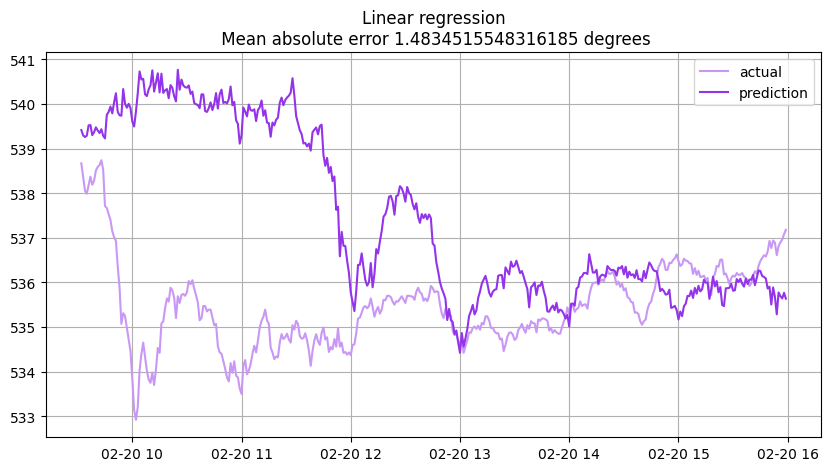

In [ ]:
model = LinearRegression()
model.fit(data_QQQ_train, result_QQQ_train)
prediction = model.predict(data_QQQ_test)

plt.figure(figsize=(10, 5))
plt.plot(data_QQQ_test.index, result_QQQ_test.values, label="actual", color=our_colors[0])
plt.plot(data_QQQ_test.index, prediction, "r", label="prediction", color=our_colors[3])
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {np.sqrt(mae(prediction, result_QQQ_test))} degrees");

<ipython-input-46-8e00b71a0809>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(data_SPY_test.index, prediction, "r", label="prediction", color=our_colors[4])


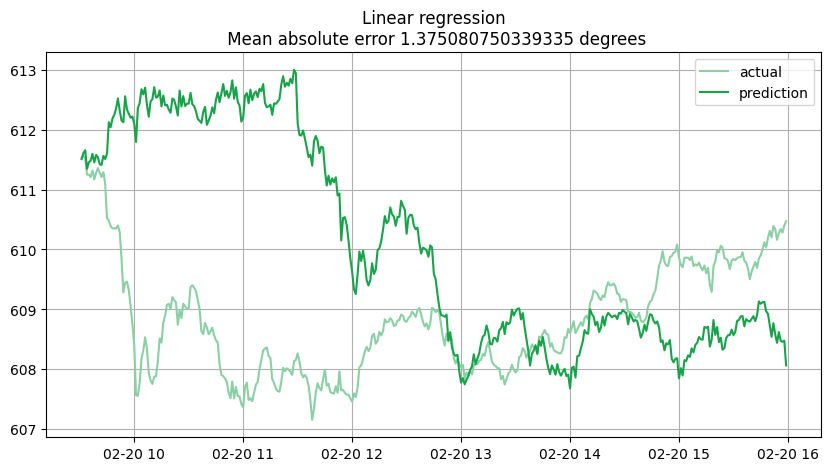

In [ ]:
model = LinearRegression()
model.fit(data_SPY_train, result_SPY_train)
prediction = model.predict(data_SPY_test)

plt.figure(figsize=(10, 5))
plt.plot(data_SPY_test.index, result_SPY_test.values, label="actual", color=our_colors[1])
plt.plot(data_SPY_test.index, prediction, "r", label="prediction", color=our_colors[4])
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {np.sqrt(mae(prediction, result_SPY_test))} degrees");

<ipython-input-47-1167ccfb21d4>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(data_SPX_test.index, prediction, "r", label="prediction", color=our_colors[5])


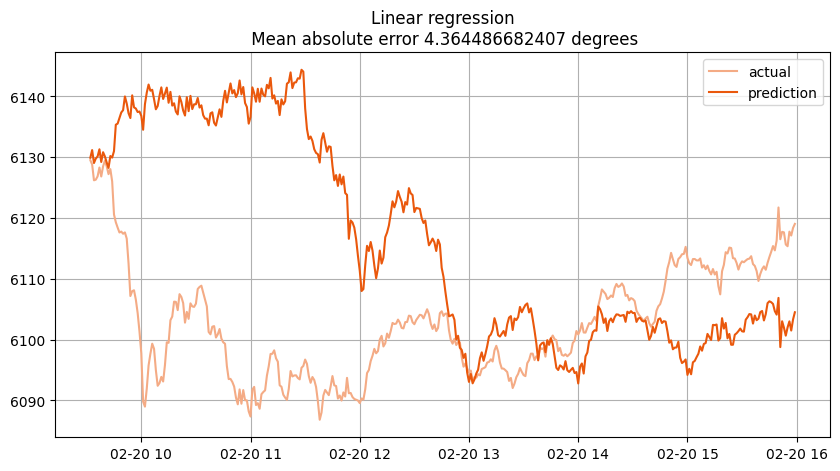

In [ ]:
# На SPX самая большая ошибка, однкао это связано с тем что цена выше в абсолютных значениях
model = LinearRegression()
model.fit(data_SPX_train, result_SPX_train)
prediction = model.predict(data_SPX_test)

plt.figure(figsize=(10, 5))
plt.plot(data_SPX_test.index, result_SPX_test.values, label="actual", color=our_colors[2])
plt.plot(data_SPX_test.index, prediction, "r", label="prediction", color=our_colors[5])
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {np.sqrt(mae(prediction, result_SPX_test))} degrees");

<ipython-input-50-614e6b977691>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(data_SPY_test.index, prediction, "r", label="prediction", color=our_colors[4])


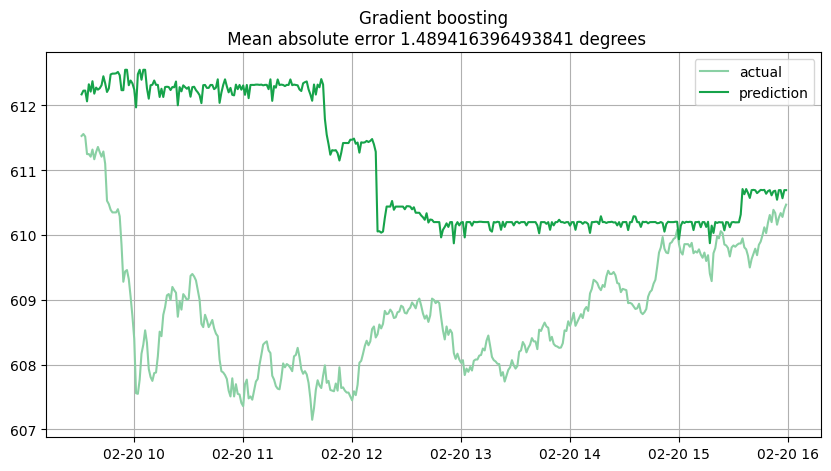

In [ ]:
# Чисто ради мема глянем как выглядит бустинг на временных рядах
model = GradientBoostingRegressor()
model.fit(data_SPY_train, result_SPY_train)
prediction = model.predict(data_SPY_test)

plt.figure(figsize=(10, 5))
plt.plot(data_SPY_test.index, result_SPY_test.values, label="actual", color=our_colors[1])
plt.plot(data_SPY_test.index, prediction, "r", label="prediction", color=our_colors[4])
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Gradient boosting\n Mean absolute error {np.sqrt(mae(prediction, result_SPY_test))} degrees");